##### ***Ethereum price analysis project ( 2015-08-07 : 2021-08-28 )***
##### Data copyright : https://finance.yahoo.com/quote/ETH-USD/history/

In [1]:
# Importing the required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pylab import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize']=[14,6]
sns.set_style('dark')

In [2]:
# Importing the data set
df=pd.read_csv('Downloads/ETH-USD.csv',index_col='Date',parse_dates=True)

In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
...,...,...,...,...,...,...
2021-08-24,3324.855469,3358.688232,3154.121338,3172.456299,3172.456299,2.013103e+10
2021-08-25,3174.269775,3248.727295,3086.114990,3224.915283,3224.915283,1.890273e+10
2021-08-26,3228.747314,3249.655273,3060.228760,3100.325439,3100.325439,1.740567e+10


<AxesSubplot:xlabel='Date'>

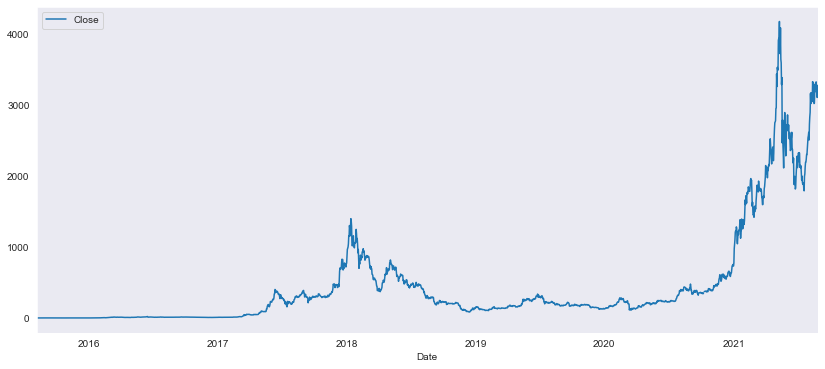

In [4]:
# get the prices of each day to work on
dfx = df[['Close']]
dfx.index.freq = 'D'
dfx.plot()

In [5]:
dfx.Close.describe()

count    2210.000000
mean      437.466688
std       690.656208
min         0.434829
25%        14.283775
50%       203.998504
75%       410.428489
max      4168.701172
Name: Close, dtype: float64

In [6]:
# NOTE :- data variance is very high 
print(f'std =  {dfx.Close.describe()[2]}')
print(f'mean =  {dfx.Close.describe()[1]}')

std =  690.6562081057139
mean =  437.46668806425356


In [7]:
# fill nulls with the most suitable values

<AxesSubplot:xlabel='Date'>

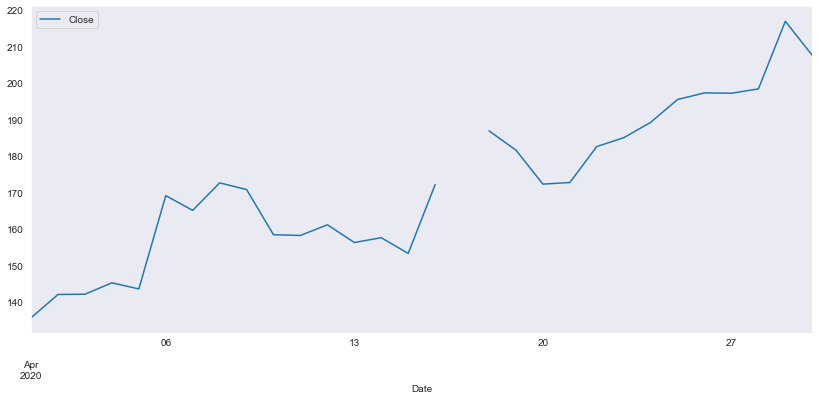

In [8]:
dfx['2020-04'].plot()

In [9]:
dfx.loc['2020-04-17'] = (dfx.loc['2020-04-16'] + dfx.loc['2020-04-18']) /2

<AxesSubplot:xlabel='Date'>

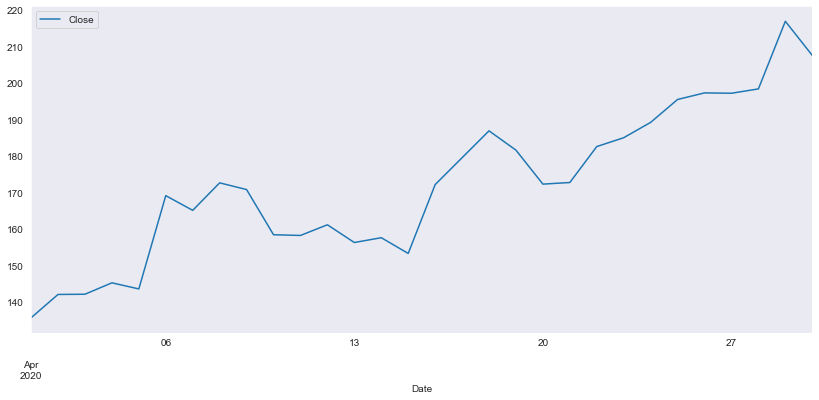

In [10]:
dfx['2020-04'].plot()

In [11]:
dfx.loc['2020-10-09'] = (dfx.loc['2020-10-08'] + dfx.loc['2020-10-10']) /2
dfx.loc['2020-10-12'] = (dfx.loc['2020-10-11'] + dfx.loc['2020-10-18']) /2
dfx.loc['2020-10-13'] = (dfx.loc['2020-10-11'] + dfx.loc['2020-10-18']) /2

<AxesSubplot:xlabel='Date'>

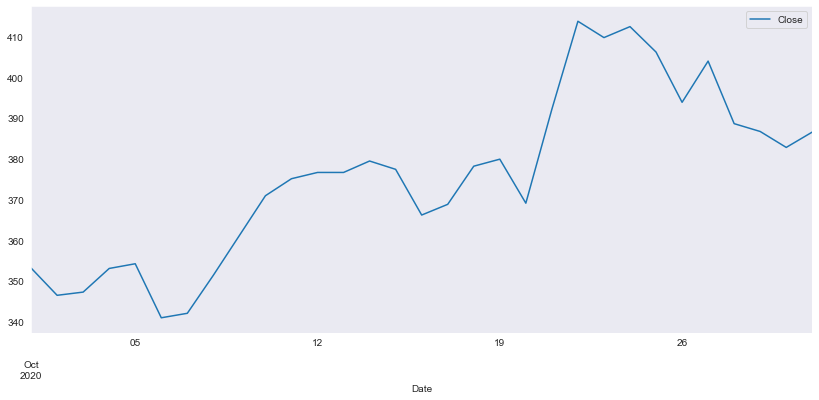

In [12]:
dfx.loc['2020-10'].plot()

In [13]:
# finding the trend using Simple Moving Average

In [14]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [15]:
trend = SimpleExpSmoothing(dfx).fit(2/(1+60)).fittedvalues.shift(-1)

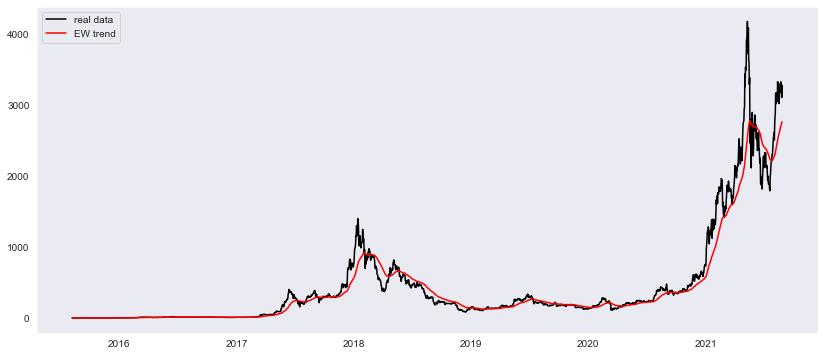

In [16]:
plt.plot(dfx,label='real data',color = 'k')
plt.plot(trend,label = 'EW trend',color = 'r')
plt.legend()

In [17]:
dfx['EWMA60_trend'] = trend

In [18]:
dfx.dropna(inplace=True)
dfx.index.freq = 'D'

In [19]:
years = dfx.resample('A').mean()
years = years.index

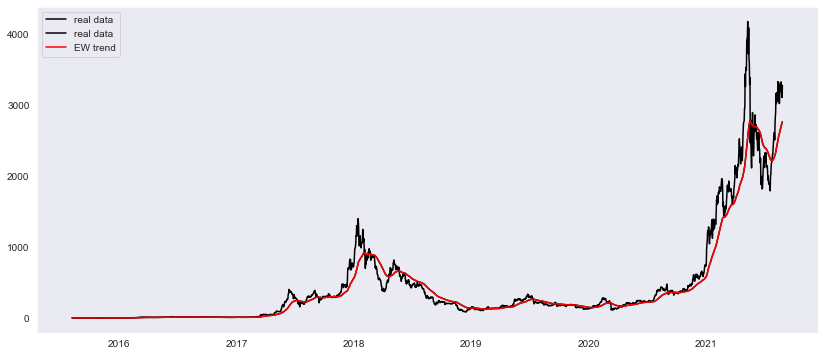

In [20]:
plt.plot(dfx,label='real data',color = 'k')
plt.plot(trend,label = 'EW trend',color = 'r')
plt.legend()

<AxesSubplot:xlabel='Date'>

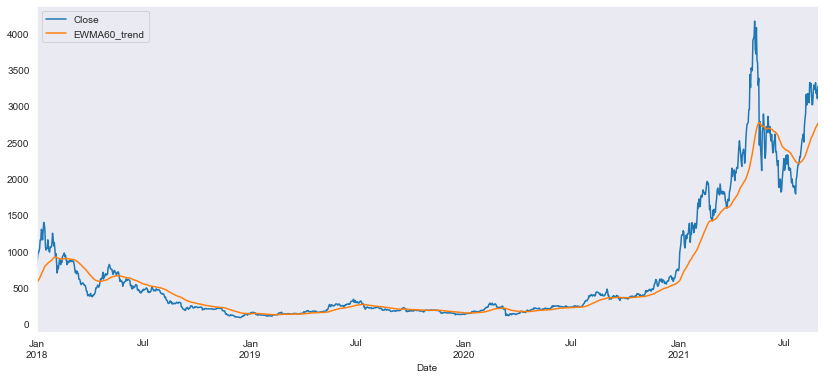

In [21]:
dfx.loc['2018':].plot()

<AxesSubplot:xlabel='Date'>

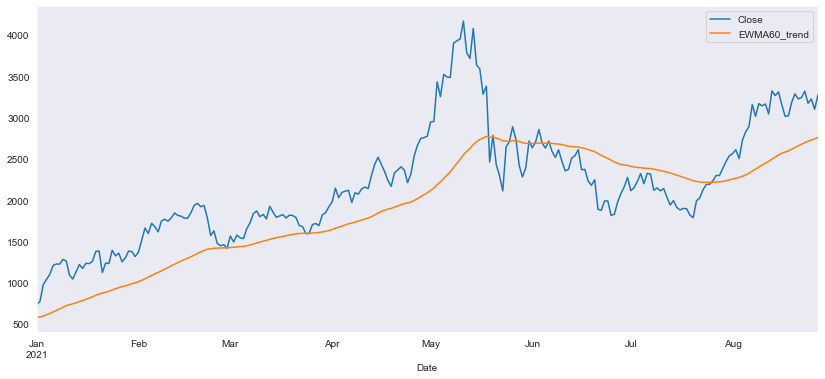

In [22]:
dfx.loc['2021':].plot()

<AxesSubplot:xlabel='Date'>

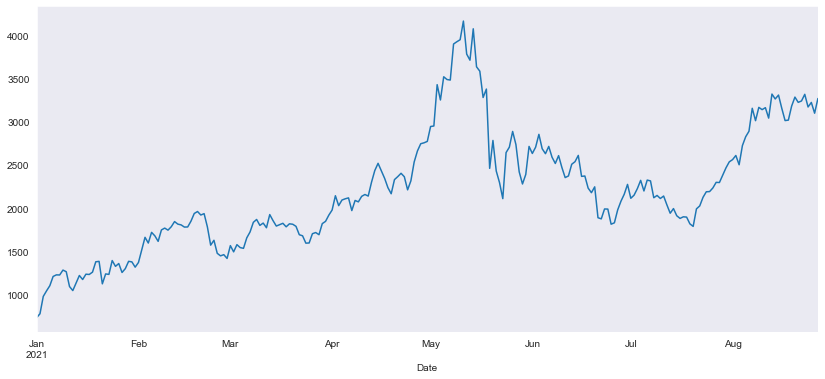

In [23]:
# geting data of 2021 only
y2021 = dfx.Close.loc['2021':]
y2021.plot()

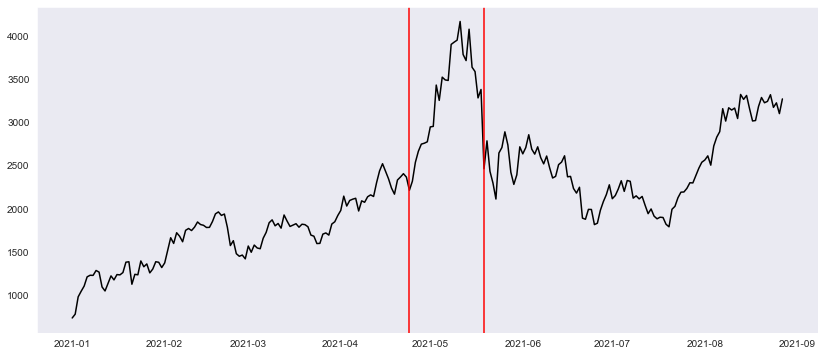

In [24]:
# NOTE :- There is pump and dump happend during 2021-04-24 /  2021-05-19
import datetime as dt
plt.plot(y2021,c='k')
plt.axvline(dt.datetime(2021, 4, 24),color='r')
plt.axvline(dt.datetime(2021, 5, 19),color='r')

<AxesSubplot:xlabel='Date'>

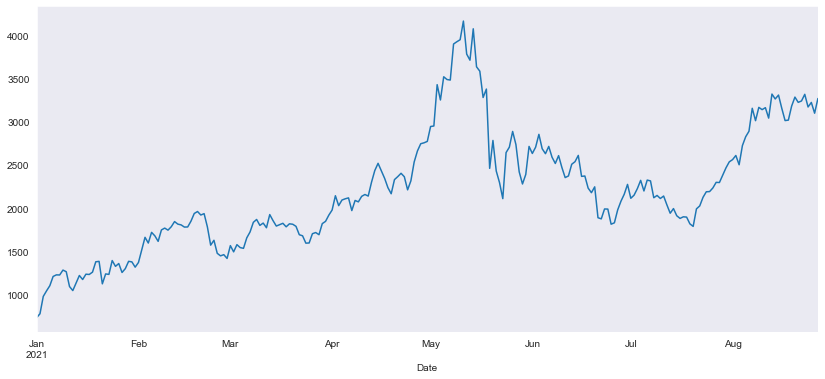

In [25]:
y2021.plot()

<AxesSubplot:xlabel='Date'>

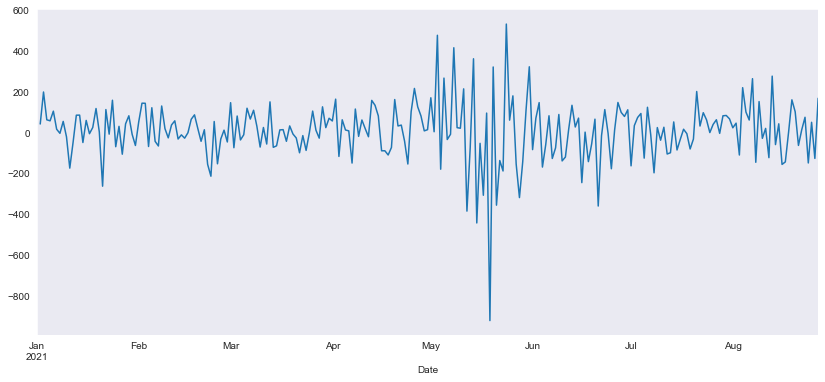

In [26]:
# first diff
y2021.diff().plot()

In [27]:
# check stationarity using Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
adfuller(dfx.Close.diff().dropna())

(-8.188950764671253,
 7.761311186919781e-13,
 27,
 2184,
 {'1%': -3.4333477117905487,
  '5%': -2.8628642889373044,
  '10%': -2.5674749845110627},
 23066.465036394427)

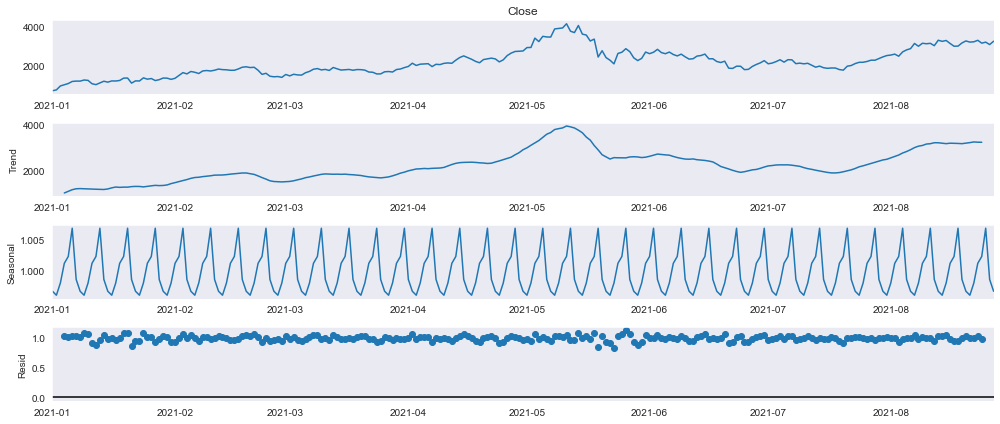

In [28]:
# check seasonality ,trend and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
ssnl = seasonal_decompose(y2021,model='multiplicative')
ssnl.plot();

<AxesSubplot:xlabel='Date'>

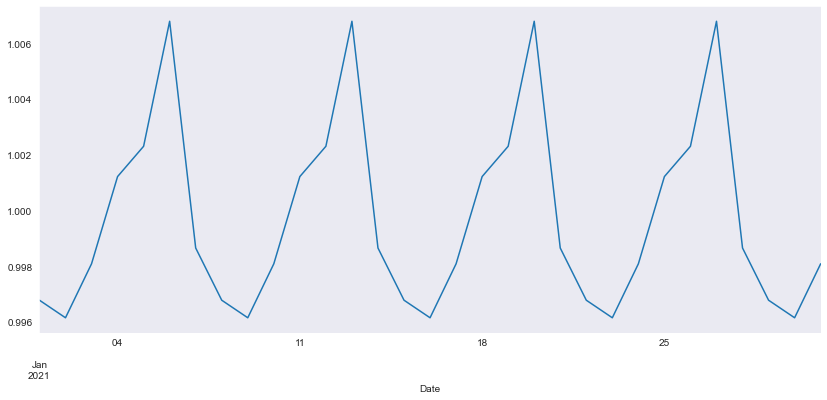

In [29]:
# determine the seasonality 
ssnl.seasonal.loc['2021-01-01':'2021-01-31'].plot()

<AxesSubplot:xlabel='Day'>

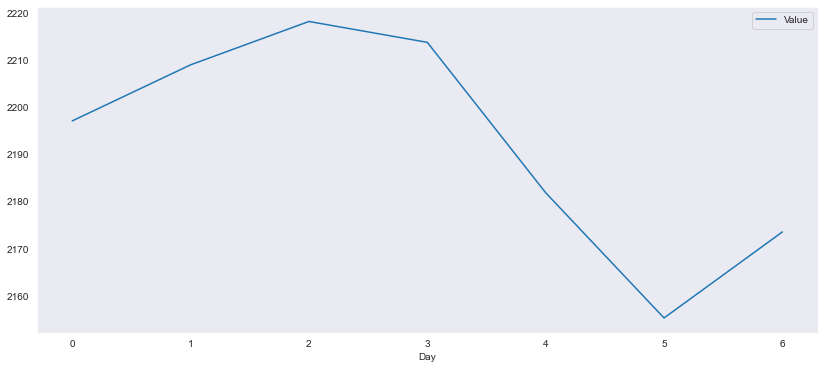

In [30]:
#Prove the week seasonality 
d =pd.DataFrame({'Value':y2021,
                 'Day':y2021.index.weekday})
d.groupby('Day').mean().plot()


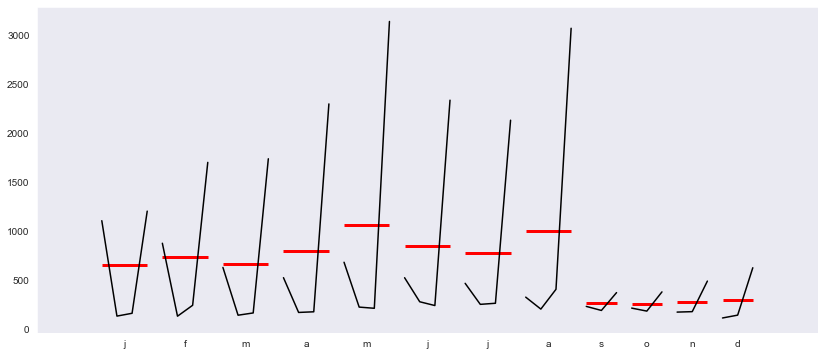

In [31]:
# checking monthly seasonaliry from 2018 -> 2021
from statsmodels.graphics.tsaplots import month_plot
month_plot(dfx.loc['2018':].Close.resample('MS').mean());

In [32]:
# There is a monthly seasonality + weekly seasonality

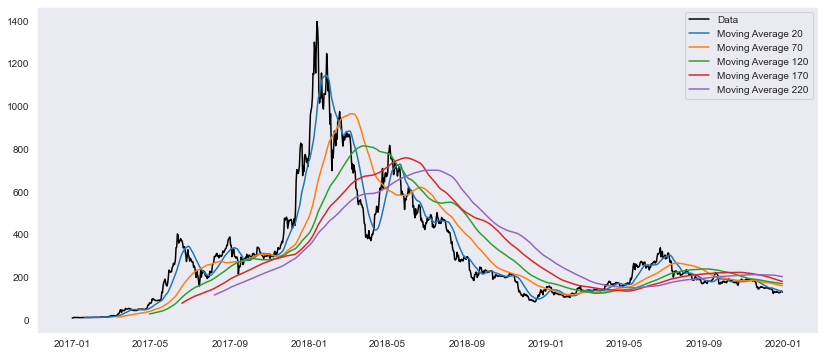

In [33]:
# checking many levels of general tredes

plt.plot(df["Close"].loc['2017':'2019'],label = 'Data',c='k')
for i in range (20,250,50):
    plt.plot(df['Close'].loc['2017':'2019'].rolling(i).mean(),label = f'Moving Average {i}')
    plt.legend()

<AxesSubplot:xlabel='Date'>

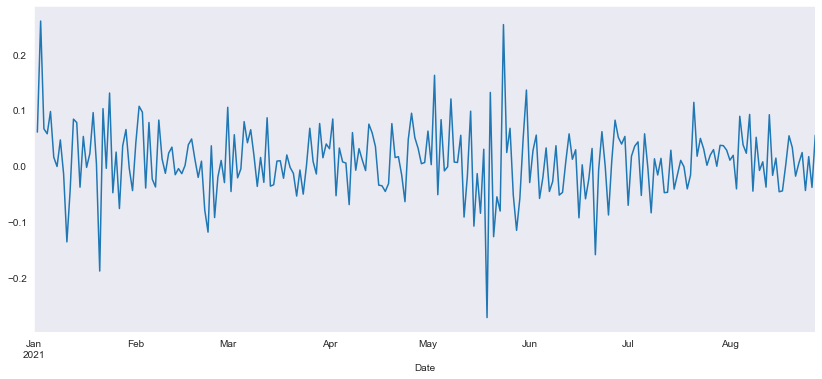

In [34]:
#rate of change at each observation
y2021.pct_change().plot()

<AxesSubplot:xlabel='Date'>

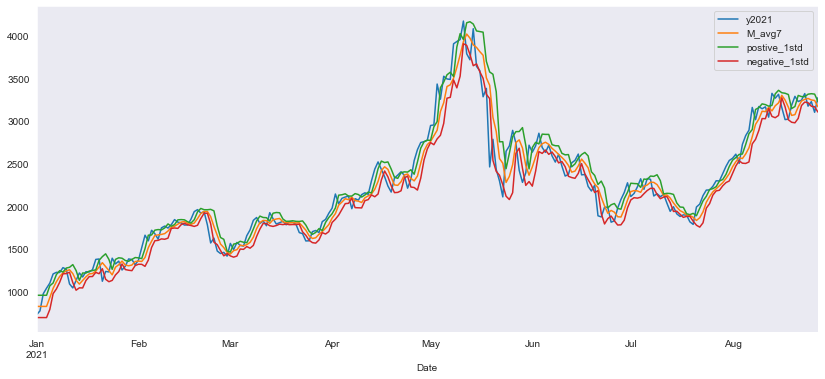

In [35]:
#using Moving average and Moving Std to try to apply Empirical rule of 67%


std=[]
mean=[]
for j in y2021.reset_index().index:
    s = y2021.iloc[j-3:j].std()
    m = y2021.iloc[j-3:j].mean()
    std.append(s)
    mean.append(m)
d = pd.DataFrame({'y2021':y2021,
                 'M_std7':std,
                 'M_avg7':mean},index=y2021.index)
d=d.bfill()
d['postive_1std']= d.M_avg7+d.M_std7
d['negative_1std']= d.M_avg7-d.M_std7
d[['y2021','M_avg7','postive_1std','negative_1std']].plot()